# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- The Altcoin Evolution – Part IV: The Challenges – The Sales Pitch.  With the ever-changing landscape of tech development and crypto innovation, regulation tends to lag behind in order to have time to react to what’s happening. Many altcoin projects are currently growing exponentially as they are exploring largely untouched use cases. As the tech continues to proliferate and expand, more and more “problems” are arising that require solutions. &#160; This obviously provides more space for viable contenders to occupy in a crowded market. This provides a robust growth argument for many altcoins, but there is a catch. The giant growth gains are fantastic, but we also must consider that large corporate banks do not tend to react positively to any challenges to their dominance of the financial industry. The Federal Reserve and other federal government bodies certainly have an eye open to the chaos as well. Ripple (XRP) is a prime example of this, as the project has been experiencing ongoing back-and-forth dialogue with the SEC for some time now, all while still sitting in the top 10 of token market caps. The Altcoin Evolution: The Lay Of The Land At this point, it’s rather difficult to predict the trajectory of these contingencies. Regulation is always a few steps behind, but it is a certainty. Despite these hurdles, which are far-reaching and constantly evolving, every project must have growth objectives. As we have with past publications of “Altcoin Evolution”, we will continue to look at the emerg... ... [| Skaityti daugiau](https://www.newsbtc.com/news/the-altcoin-evolution-part-iv/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid origin: US spy agencies publish 'inconclusive' report.  The office that oversees US spy agencies could not establish how the coronavirus pandemic began. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-us-canada-58361211) 

### Kainų kaita pandemijos metu

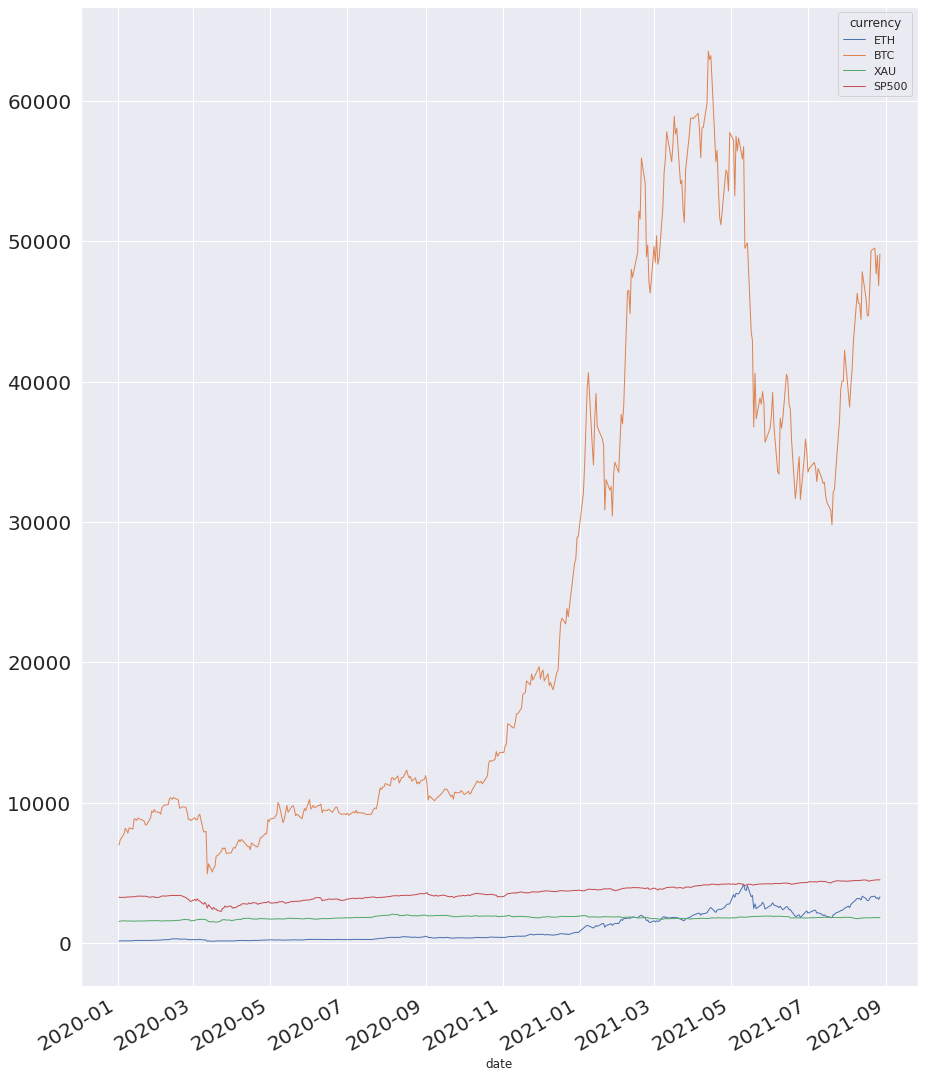

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.888231,0.186816,0.879126
BTC,0.888231,1.000000,0.137192,0.832289
XAU,0.186816,0.137192,1.000000,0.355103
SP500,0.879126,0.832289,0.355103,1.000000


In [8]:
#hide ### Koreliacijos matrica.

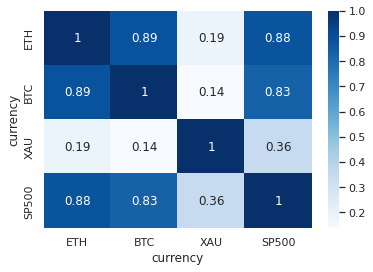

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')